In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('countries.csv')
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Richest Country on per-person basic

In [17]:
#step1: group by and get the sum of  gdpPerCapita for each country
country_total_gdpPerCapita = data.groupby(['country']).sum()
country_total_gdpPerCapita.head()

,year,lifeExpectancy,population,gdpPerCapita
country,,,,
Afghanistan,23754,449.746,189884585,9632.095181
Albania,23754,821.195,30962990,39064.399592
Algeria,23754,708.362,238504874,53112.311678
Angola,23754,454.602,87712681,43285.206346
Argentina,23754,828.725,343226879,107466.645392


In [18]:
#step2: sort gdpPercapita and get the highest one
richest_country = country_total_gdpPerCapita.sort_values('gdpPerCapita',ascending=False).head(1)
richest_country

,year,lifeExpectancy,population,gdpPerCapita
country,,,,
Kuwait,23754,827.068,14477947,783994.92566


---------------

In [28]:
mean_gdpPerCapita = data.groupby(['country']).mean().gdpPerCapita

In [30]:
top5 = mean_gdpPerCapita.sort_values(ascending=False)
top5

country
Kuwait           65332.910472
Switzerland      27074.334405
Norway           26747.306554
United States    26261.151347
Canada           22410.746340
                     ...     
Mozambique         542.278332
Eritrea            541.002507
Ethiopia           509.115155
Burundi            471.662990
Myanmar            439.333333
Name: gdpPerCapita, Length: 142, dtype: float64

## to check whether Kuwait is the really richest country (on a per-person basic)?

In [33]:
kuwait = data[data.country == 'Kuwait']
kuwait.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
852,Kuwait,Asia,1952,55.565,160000,108382.35290
853,Kuwait,Asia,1957,58.033,212846,113523.13290
854,Kuwait,Asia,1962,60.470,358266,95458.11176
855,Kuwait,Asia,1967,64.624,575003,80894.88326
856,Kuwait,Asia,1972,67.712,841934,109347.86700


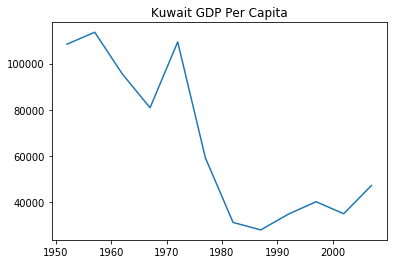

In [35]:
plt.plot(kuwait.year, kuwait.gdpPerCapita)
plt.title('Kuwait GDP Per Capita')
plt.show()

it seem like Kuwait GDP per capita was very high before 1980.
what happened after that?

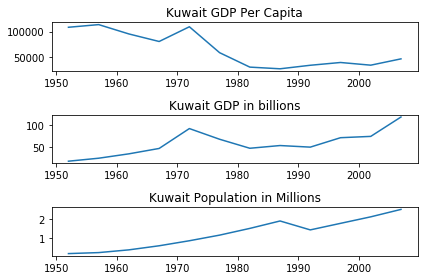

In [37]:
plt.subplot(311)
plt.title('Kuwait GDP Per Capita')
plt.plot(kuwait.year, kuwait.gdpPerCapita)

plt.subplot(312)
plt.title('Kuwait GDP in billions')
plt.plot(kuwait.year, kuwait.gdpPerCapita * kuwait.population / 10**9)

plt.subplot(313)
plt.title('Kuwait Population in Millions')
plt.plot(kuwait.year, kuwait.population / 10**6)

plt.tight_layout() #to fix title fit in
plt.show()

now we can see Kuwait GDP got lower during 1980 crisis, but GDP get picked up after that.
However, population also got growing which might be the reason for lower GDP per capita.
To know more, we will check relative growth.

## Relative Growth

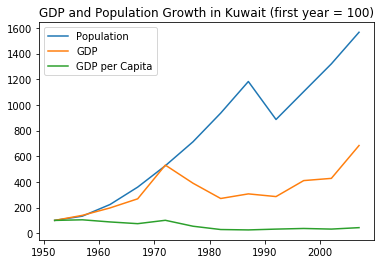

In [40]:
plt.plot(kuwait.year, kuwait.population / kuwait.population.iloc[0] * 100 )

kuwait_gdp = kuwait.population * kuwait.gdpPerCapita 
plt.plot(kuwait.year, kuwait_gdp / kuwait_gdp.iloc[0] * 100)

plt.plot(kuwait.year, kuwait.gdpPerCapita / kuwait.gdpPerCapita.iloc[0] * 100 )

plt.title('GDP and Population Growth in Kuwait (first year = 100)')
plt.legend(['Population', 'GDP', 'GDP per Capita'])

plt.show()

## comparing with USA data

In [41]:
us = data[data.country == 'United States']
us.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
1608,United States,Americas,1952,68.44,157553000,13990.48208
1609,United States,Americas,1957,69.49,171984000,14847.12712
1610,United States,Americas,1962,70.21,186538000,16173.14586
1611,United States,Americas,1967,70.76,198712000,19530.36557
1612,United States,Americas,1972,71.34,209896000,21806.03594


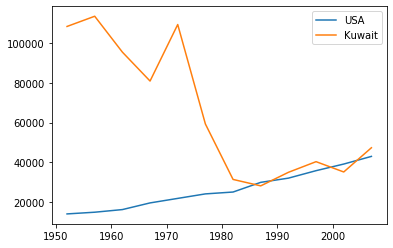

In [42]:
plt.plot(us.year, us.gdpPerCapita)
plt.plot(kuwait.year, kuwait.gdpPerCapita)
plt.legend(['USA', 'Kuwait'])
plt.show()